In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import numpy as np
import os
import pandas
from matplotlib.font_manager import FontProperties

In [2]:
plt.rcParams['figure.figsize'] = (20, 13)
plt.rcParams['font.size'] = 16
fontP = FontProperties()
fontP.set_size('xx-small')

In [3]:
df = pandas.read_csv('../data/sample/c19s.results.summary.tsv', sep = '\t')

In [4]:
df.head()

,time,susceptible (total) median,susceptible (total) lower bound,susceptible (total) upper bound,severe (total) median,severe (total) lower bound,severe (total) upper bound,exposed (total) median,exposed (total) lower bound,exposed (total) upper bound,...,cumulative recovered (total) upper bound,cumulative hospitalized (total) median,cumulative hospitalized (total) lower bound,cumulative hospitalized (total) upper bound,cumulative ICU (total) median,cumulative ICU (total) lower bound,cumulative ICU (total) upper bound,cumulative fatality (total) median,cumulative fatality (total) lower bound,cumulative fatality (total) upper bound
0,2020-09-16,58771461,58771461,58771461,2144,0,0,71372,101104,101104,...,0,0,0,0,0,0,0,0,0,0
1,2020-09-17,58738849,58746401,58748313,2204,45,46,79985,90863,93036,...,17260,734,53,53,161,1,1,100,0,0
2,2020-09-18,58705749,58715012,58719386,2260,105,107,87579,88143,92744,...,38893,1479,137,139,326,3,4,203,0,0
3,2020-09-19,58671486,58679668,58687039,2327,207,215,93945,90473,97428,...,63248,2252,288,299,495,10,11,310,2,2
4,2020-09-20,58635453,58641587,58652578,2412,372,396,99769,95050,104303,...,89480,3064,548,578,670,26,28,422,8,9


In [5]:
all_col = list(df.columns.values)
all_col

['time',
 'susceptible (total) median',
 'susceptible (total) lower bound',
 'susceptible (total) upper bound',
 'severe (total) median',
 'severe (total) lower bound',
 'severe (total) upper bound',
 'exposed (total) median',
 'exposed (total) lower bound',
 'exposed (total) upper bound',
 'overflow (total) median',
 'overflow (total) lower bound',
 'overflow (total) upper bound',
 'ICU (total) median',
 'ICU (total) lower bound',
 'ICU (total) upper bound',
 'infectious (total) median',
 'infectious (total) lower bound',
 'infectious (total) upper bound',
 'weeklyFatality (total) median',
 'weeklyFatality (total) lower bound',
 'weeklyFatality (total) upper bound',
 'cumulative recovered (total) median',
 'cumulative recovered (total) lower bound',
 'cumulative recovered (total) upper bound',
 'cumulative hospitalized (total) median',
 'cumulative hospitalized (total) lower bound',
 'cumulative hospitalized (total) upper bound',
 'cumulative ICU (total) median',
 'cumulative ICU (tot

In [6]:
relevant_col = ['susceptible (total) median', 'severe (total) median', 'exposed (total) median', 'overflow (total) median', 
                'ICU (total) median','infectious (total) median', 'weeklyFatality (total) median', 
                'cumulative recovered (total) median', 'cumulative hospitalized (total) median', 
                'cumulative ICU (total) median', 'cumulative fatality (total) median']

In [7]:
no_cum = ['susceptible (total) median', 'severe (total) median', 'exposed (total) median', 'overflow (total) median', 
                'ICU (total) median','infectious (total) median', 'weeklyFatality (total) median']

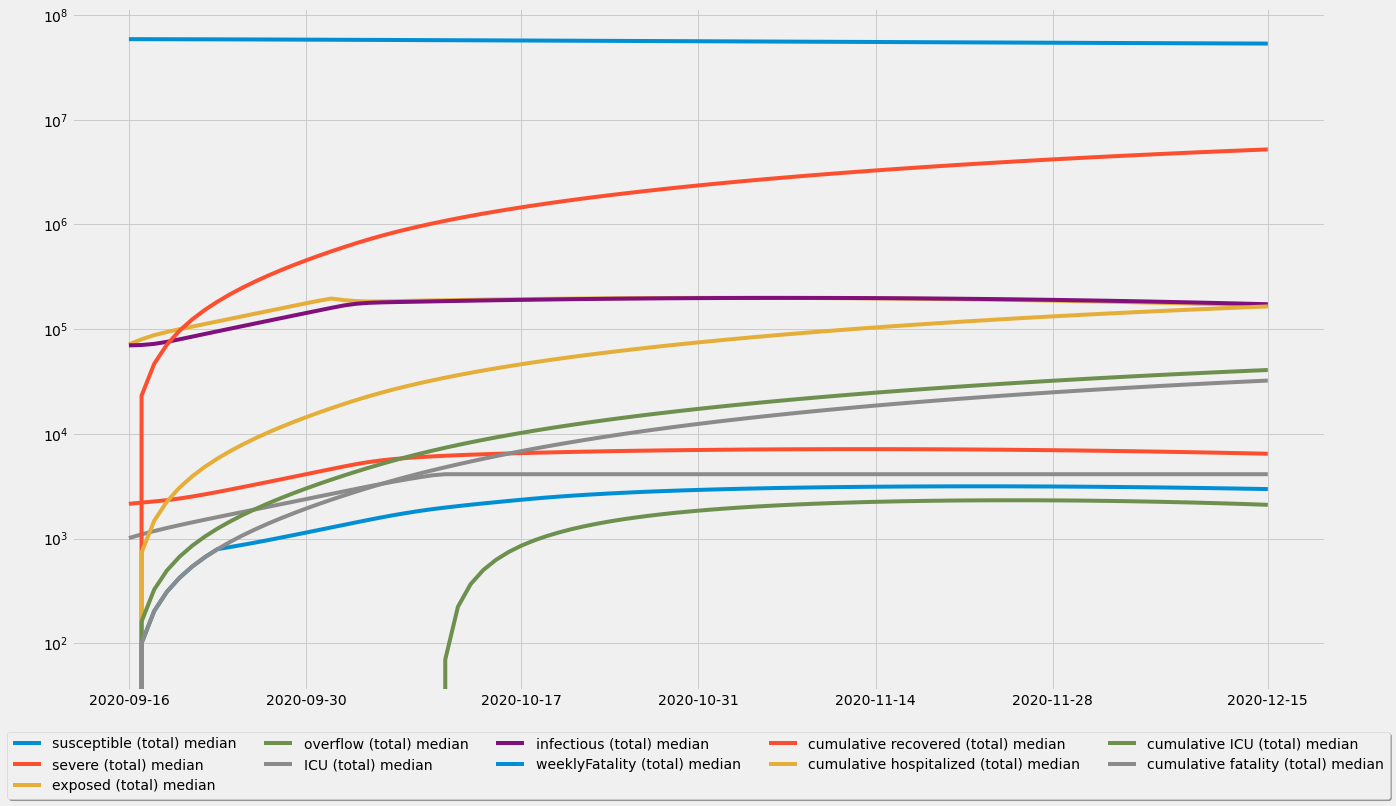

In [8]:
#all plots

# with plt.style.context('bmh'):
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots()

    locator = mdates.AutoDateLocator()
    # formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    # ax.xaxis.set_major_formatter(formatter)
    ax.set_yscale('log')
    for i in relevant_col:
        ax.plot(df['time'],df[i], label = str(i))
    # ax.legend()
    # ax.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)


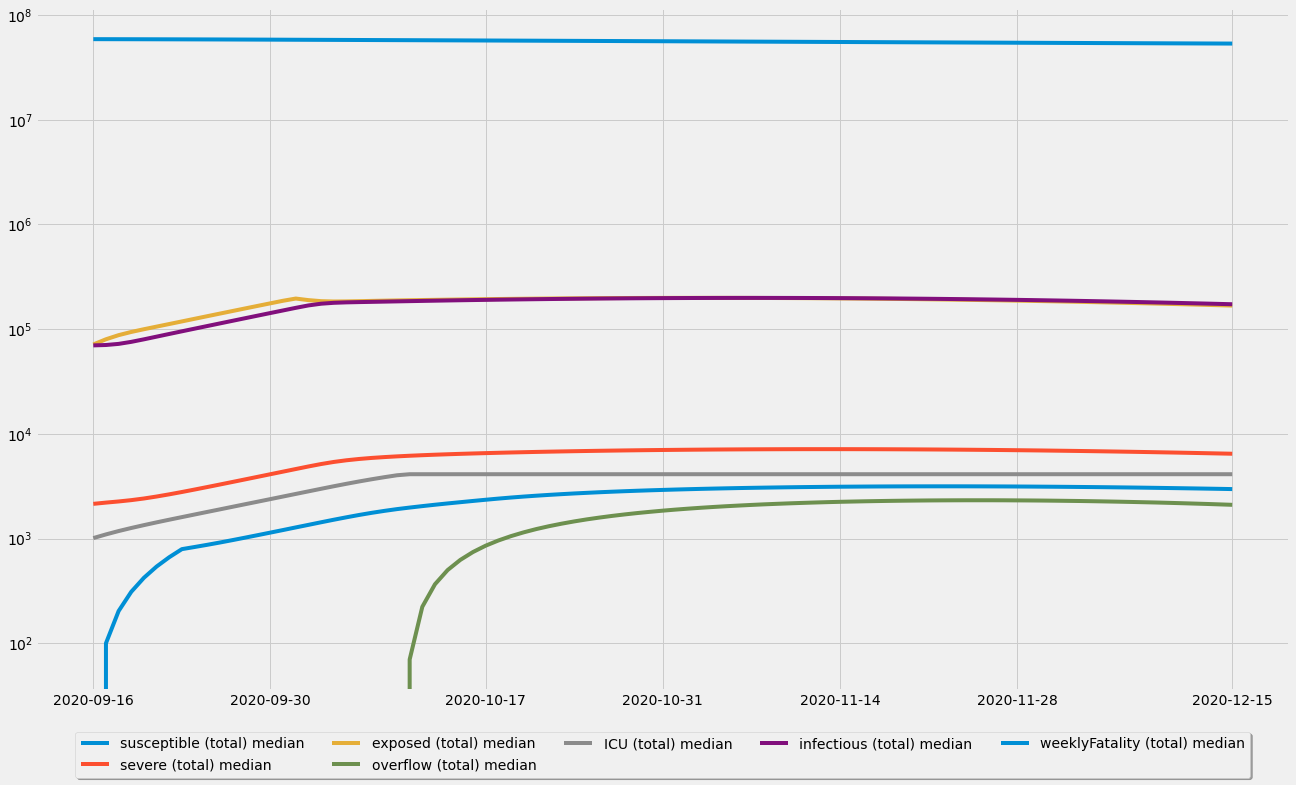

In [9]:
#remove cumulative

# with plt.style.context('bmh'):
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots()

    locator = mdates.AutoDateLocator()
    # formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    # ax.xaxis.set_major_formatter(formatter)
    ax.set_yscale('log')
    for i in no_cum:
        ax.plot(df['time'],df[i], label = str(i))
    # ax.legend()
    # ax.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)


In [10]:
ls = ['susceptible', 'severe', 'exposed', 
                'ICU','infectious', 'weeklyFatality', ]

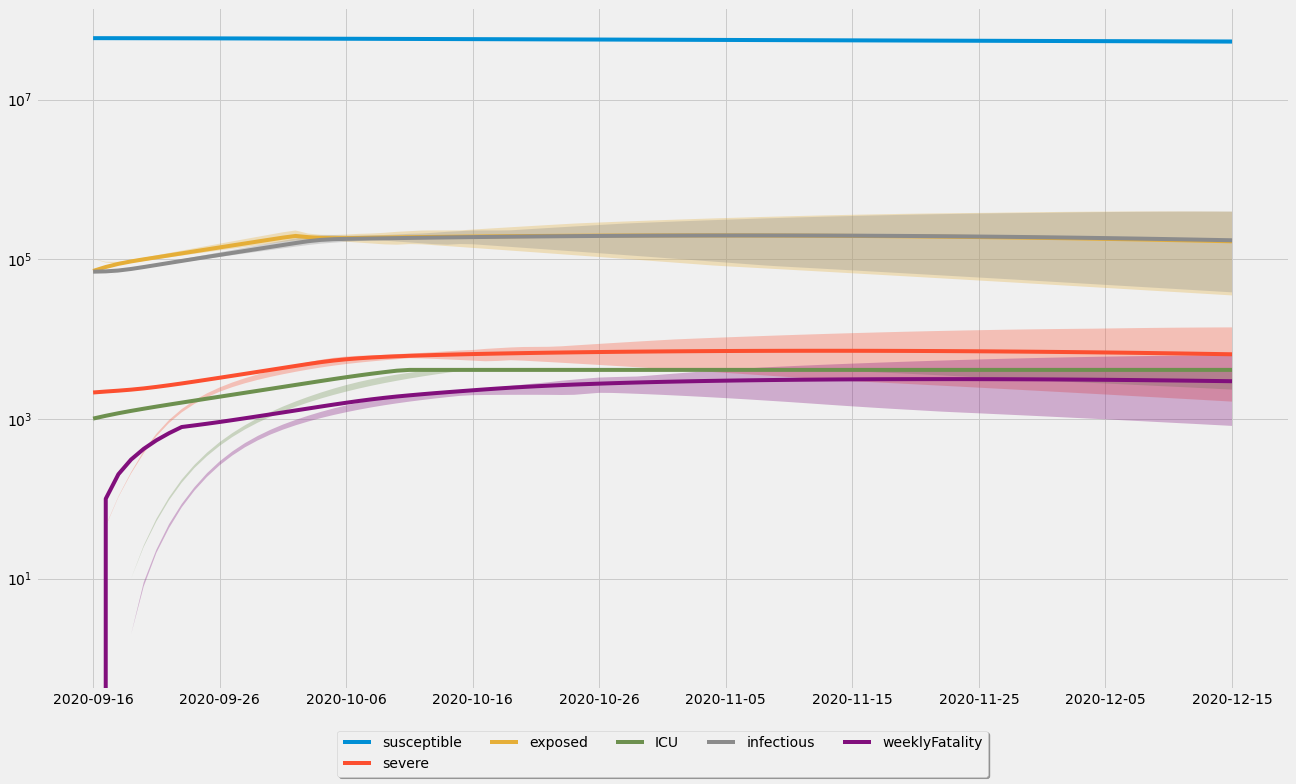

In [11]:
#add upper and lower bounds

from matplotlib.ticker import MaxNLocator
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    # matplotlib.rc('xtick',labelsize=18)
    # matplotlib.rc('ytick',labelsize=18)
    x = df['time']
    for i in ls:

        y = df[i + ' (total) median']
        y1 = df[i + ' (total) upper bound']
        y2 = df[i + ' (total) lower bound']
        ax.set_yscale('log')
#         ax.plot(x, y1)
#         ax.plot(x, y2)
        ax.fill_between(x,y2,y1,interpolate=True, alpha = 0.3)
        ax.plot(x, y, label = str(i))
        ax.xaxis.set_major_locator(MaxNLocator(nbins = 12))
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)

